In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import pickle

In [4]:
df=pd.read_csv("C:\\Users\\Purushoth\\Desktop\\Closeing\\DJIA\\DJIA(ClosingVal-tomorrow).csv")

In [5]:
df.head()

,Date,Open,High,Low,Volume,Close
0,8/11/2008,11729.66992,11867.11035,11675.53027,183190000,11782.34961
1,8/12/2008,11781.70020,11782.34961,11601.51953,173590000,11642.46973
2,8/13/2008,11632.80957,11633.78027,11453.33984,182550000,11532.95996
3,8/14/2008,11532.07031,11718.28027,11450.88965,159790000,11615.92969
4,8/15/2008,11611.20996,11709.88965,11599.73047,215040000,11659.90039


In [6]:
df.tail()

,Date,Open,High,Low,Volume,Close
1982,6/24/2016,17946.63086,17946.63086,17356.33984,239000000,17400.75000
1983,6/27/2016,17355.21094,17355.21094,17063.08008,138740000,17140.24023
1984,6/28/2016,17190.50977,17409.72070,17190.50977,112190000,17409.72070
1985,6/29/2016,17456.01953,17704.50977,17456.01953,106380000,17694.67969
1986,6/30/2016,17712.75977,17930.60938,17711.80078,133030000,17929.99023


In [7]:
df.isna().sum()

Date      0
Open      0
High      0
Low       0
Volume    0
Close     0
dtype: int64

In [8]:
df.shape

(1987, 6)

In [9]:
del df['Date']

In [10]:
X=df
X=np.array(X.drop(['Close'],1))
y=np.array(df['Close'])

In [11]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
xtrain.shape

(1589, 4)

In [13]:
ytrain.shape

(1589,)

In [14]:
xtest.shape

(398, 4)

In [15]:
ytest.shape

(398,)

### LASSO

In [16]:
from sklearn.linear_model import Ridge

In [17]:
ls = Ridge()
ls.fit(xtrain, ytrain)

Ridge()

In [18]:
ls_predictions = ls.predict(xtest)
ls_predictions

array([ 8629.18349503, 16974.69009704, 11218.90789594, 14808.48875225,
       17312.94504563, 10279.46676131, 13060.8146094 , 17867.48175745,
       15653.0078656 , 13458.53792565, 15308.57219824,  9908.97568976,
       15453.29889646, 17643.46754029, 12042.04765833, 17046.24848892,
       18002.61520999, 12561.93530621, 10239.1193258 ,  9183.53934608,
       12503.22997119, 15354.64015877, 10938.02823213, 18051.95838122,
       16309.8076601 , 13045.24592113, 14784.55399002, 12103.36698521,
       12363.39586706,  8311.83596974, 11175.62012389,  8634.04681617,
       15932.01935701, 13225.7034239 , 15570.25911575,  8019.9541859 ,
       14012.95044081, 15243.48459655, 11011.54109131, 17256.34045954,
       16924.63538629, 10860.73821863,  8260.34768538, 17738.33287627,
       11260.68781293, 15526.54497961, 15307.47084517, 11094.58740812,
       10309.69941747, 12338.77904823, 16498.38145616, 10259.37957339,
       11088.30905353,  7749.63578474, 17659.46684452, 12521.32254739,
      

In [19]:
def mda(ytest:np.ndarray,predicted:np.ndarray):
    """ Mean Directional Accuracy """
    return np.mean((np.sign(ytest[1:]-ytest[:-1])== np.sign(predicted[1:]- predicted[:-1])).astype(int))

In [20]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, ls_predictions))
print('Mean Squared Error:', metrics.mean_squared_error(ytest, ls_predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, ls_predictions)))
print('Mean Directional Accuracy:', mda(ytest, ls_predictions))

Mean Absolute Error: 40.13394991495935
Mean Squared Error: 3210.7353773797936
Root Mean Squared Error: 56.663351272050555
Mean Directional Accuracy: 0.9899244332493703


### Predicting for 26th March using 25th Open, High, Low, Volume

In [21]:
ls.predict([[32346.81,32672.69,32071.41,411990000]])

array([32390.51095208])

### Graph

In [22]:
import matplotlib.pyplot as plt

In [23]:
newdf=pd.read_csv("C:\\Users\\Purushoth\\Desktop\\Closeing\\DJIA\\DJIA(DataFrom25March)-Today.csv")

In [24]:
newdf.head()

,Date,Open,High,Low,Volume,Close
0,3/25/2021,32346.81,32672.69,32071.41,411990000.0,32619.48
1,3/26/2021,32681.07,33098.83,32681.07,382170000.0,33072.88
2,3/29/2021,33087.55,33259.00,32905.13,351610000.0,33171.37
3,3/30/2021,33127.88,33170.93,32988.92,307510000.0,33066.96
4,3/31/2021,33116.04,33173.77,32980.57,414140000.0,32981.55


In [25]:
keep_columns=['Open','High','Low','Volume']
newxval=newdf[keep_columns]

In [26]:
predictions = ls.predict(newxval)

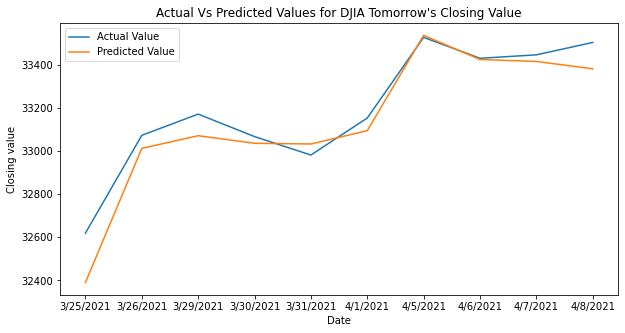

In [27]:
plt.figure(figsize=(10,5))
plt.plot(newdf['Date'],newdf['Close'], label ='Actual Value')
plt.plot(newdf['Date'],predictions, label ='Predicted Value')
plt.xlabel('Date')
plt.ylabel('Closing value')
plt.title("Actual Vs Predicted Values for DJIA Tomorrow's Closing Value")
plt.legend()

In [28]:
pickle.dump(ls, open("DWJA_tomorrowPrediction.pkl", 'wb'))
print('model saved...')

model saved...
